In [1]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix

In [2]:
# Data loading
breast_cancer_data = pd.read_csv('/content/data.txt')
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,NaN,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1) Missing Values Imputation

In [3]:
# Identifying missing values
missing_count = breast_cancer_data.isnull().sum()
total_rows = breast_cancer_data.shape[0]
print(total_rows)

569


In [4]:
# Fraction of observations with missing values
missing_observations = breast_cancer_data.isnull().any(axis=1).sum()
print(missing_observations)

fraction_missing_values = missing_observations / total_rows
print(f"Fraction of missing values = {fraction_missing_values}")

66
Fraction of missing values = 0.11599297012302284


In [5]:
# Summary of missing values
print(missing_count[missing_count > 0])

radius_mean    28
area_mean      41
dtype: int64


In [6]:
# Mean Imputation
numeric_cols = breast_cancer_data.iloc[:, 2:]
mean_imputed_data = numeric_cols.fillna(numeric_cols.mean())
print(mean_imputed_data)

# Median Imputation
# median_imputed_data = numeric_cols.fillna(numeric_cols.median())
# print(median_imputed_data)

     radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
0       17.99000         10.38          122.80  1001.000000          0.11840   
1       20.57000         17.77          132.90  1326.000000          0.08474   
2       19.69000         21.25          130.00  1203.000000          0.10960   
3       14.17541         20.38           77.58   659.519697          0.14250   
4       20.29000         14.34          135.10  1297.000000          0.10030   
..           ...           ...             ...          ...              ...   
564     21.56000         22.39          142.00  1479.000000          0.11100   
565     14.17541         28.25          131.20  1261.000000          0.09780   
566     16.60000         28.08          108.30   858.100000          0.08455   
567     20.60000         29.33          140.10  1265.000000          0.11780   
568      7.76000         24.54           47.92   181.000000          0.05263   

     compactness_mean  concavity_mean  

In [7]:
# Summary stats to inspect the scales
print(mean_imputed_data.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.175410     19.289649       91.969033   659.519697   
std       3.439312      4.301036       24.298981   338.514087   
min       6.981000      9.710000       43.790000   170.400000   
25%      11.840000     16.170000       75.170000   432.000000   
50%      13.590000     18.840000       86.240000   575.300000   
75%      15.710000     21.800000      104.100000   758.600000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

### 2) Standard Scaling using Z-score transformation

In [8]:
# Normalization using Z-score Transformation
scaler = StandardScaler()
normalized_data = scaler.fit_transform(mean_imputed_data)
data_scaled = pd.DataFrame(normalized_data, columns=mean_imputed_data.columns)
print(data_scaled)

      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    1.110090e+00     -2.073335        1.269934   1.009650         1.568466   
1    1.860900e+00     -0.353632        1.685955   1.970573        -0.826962   
2    1.604810e+00      0.456187        1.566503   1.606901         0.942210   
3   -5.169406e-16      0.253732       -0.592687   0.000000         3.283553   
4    1.779417e+00     -1.151816        1.776573   1.884829         0.280372   
..            ...           ...             ...        ...              ...   
564  2.149002e+00      0.721473        2.060786   2.422946         1.041842   
565 -5.169406e-16      2.085134        1.615931   1.778388         0.102458   
566  7.055839e-01      2.045574        0.672676   0.587140        -0.840484   
567  1.869631e+00      2.336457        1.982524   1.790215         1.525767   
568 -1.866959e+00      1.221792       -1.814389  -1.414833        -3.112085   

     compactness_mean  concavity_mean  concave_poin

### 3) Heatmap of Normalized Data

In [9]:
# Add labels to scaled data
labels = breast_cancer_data['diagnosis']
data_scaled['diagnosis'] = labels

In [10]:
# Sort the data based on diagnosis
sorted_scaled_data = data_scaled.sort_values(by='diagnosis')

# Remove diagnosis column
sorted_scaled_data = sorted_scaled_data.drop(columns=['diagnosis'])

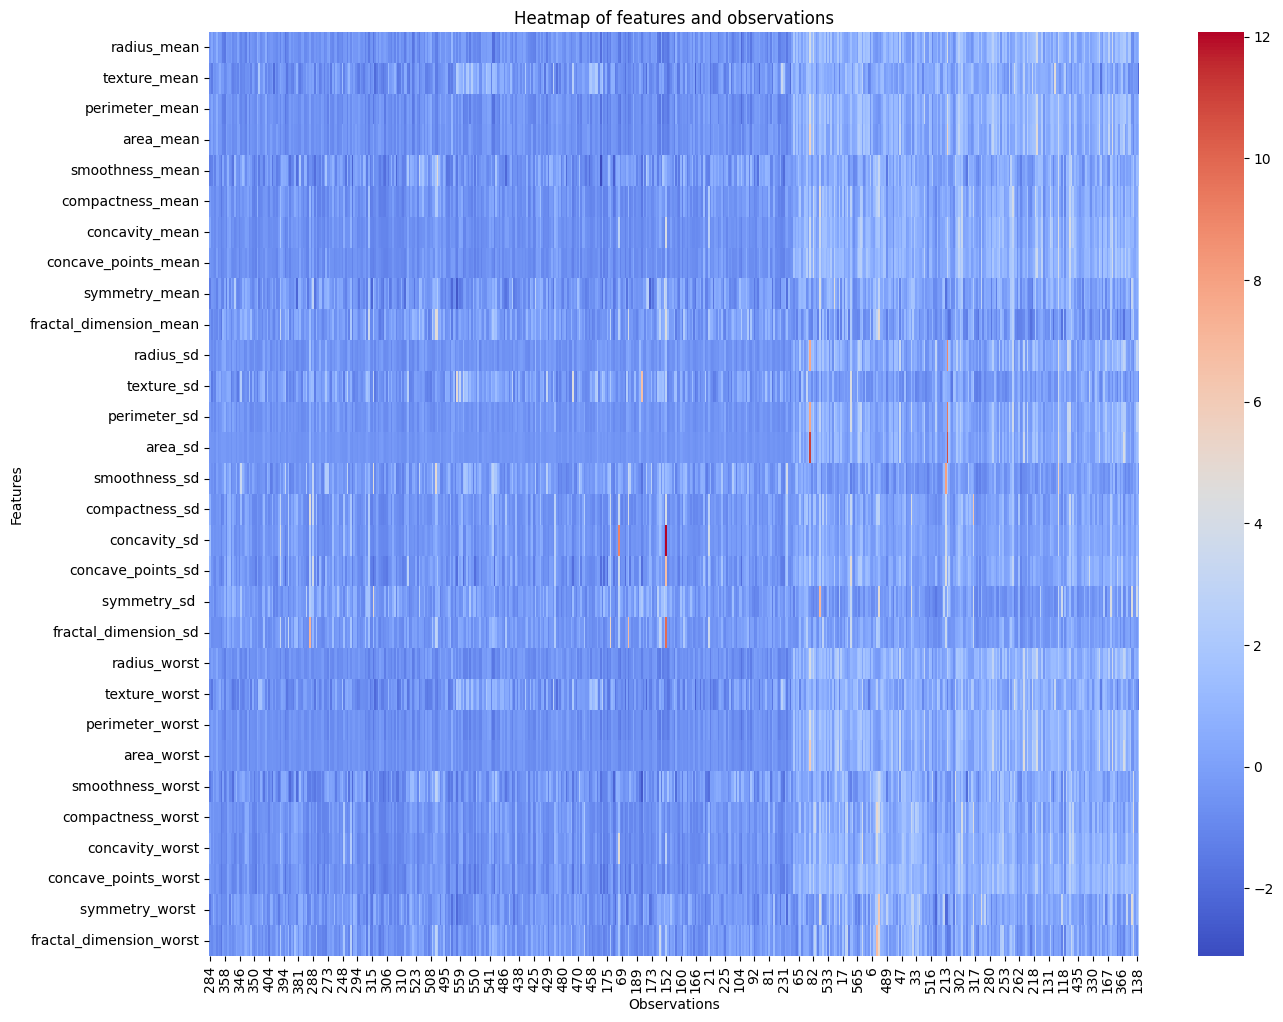

In [11]:
# Create heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(sorted_scaled_data.T, cmap='coolwarm', cbar=True)
plt.title('Heatmap of features and observations')
plt.xlabel('Observations')
plt.ylabel('Features')
plt.show()

### Inference from the heatmap



1.   In heatmap, red indicates higher feature values and blue lower feature values.
2.   Clusters can be observe of similar patterns indicating possible differences between malignant and benign cases.
3. Some features show strong co-variation across samples, indicating possible correlations between them.

### 4) Different Visualizations to examine differences in the distribution of the features between malignant and benign tumors

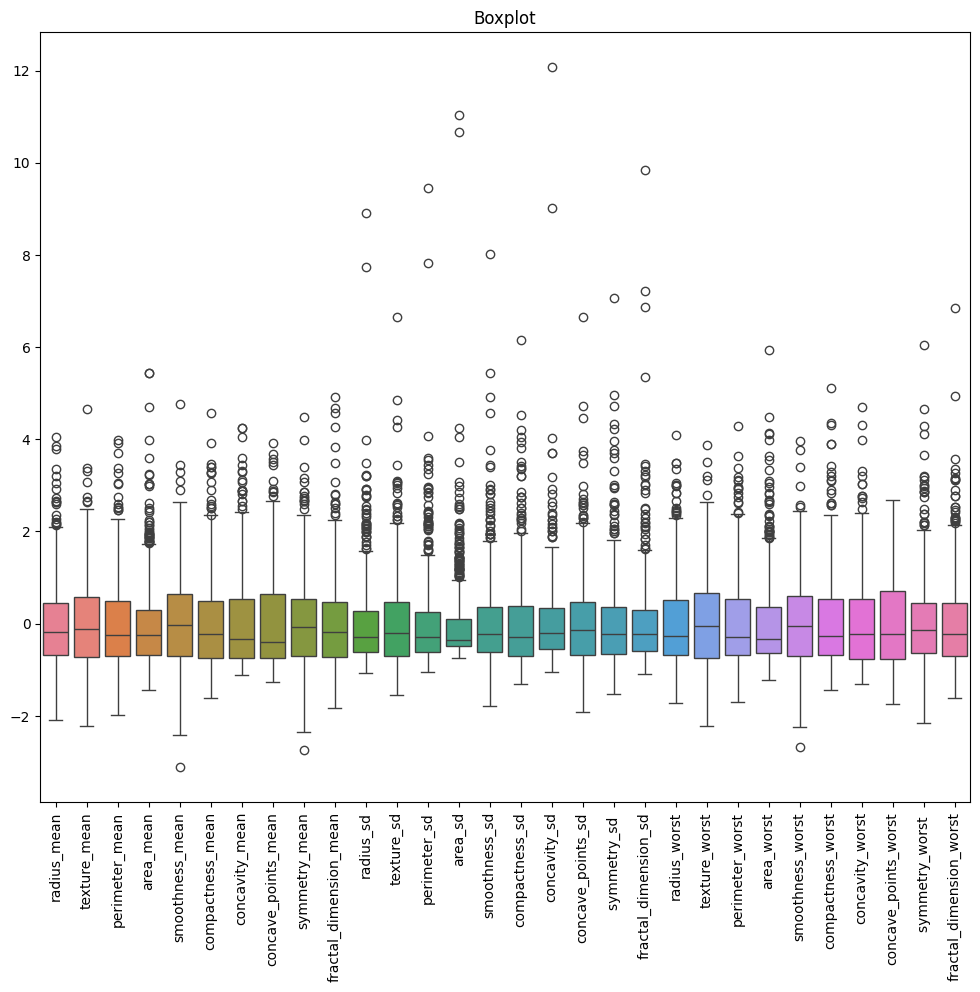

In [12]:
# Boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(data=sorted_scaled_data)
plt.title('Boxplot')
plt.xticks(rotation=90)
plt.show()

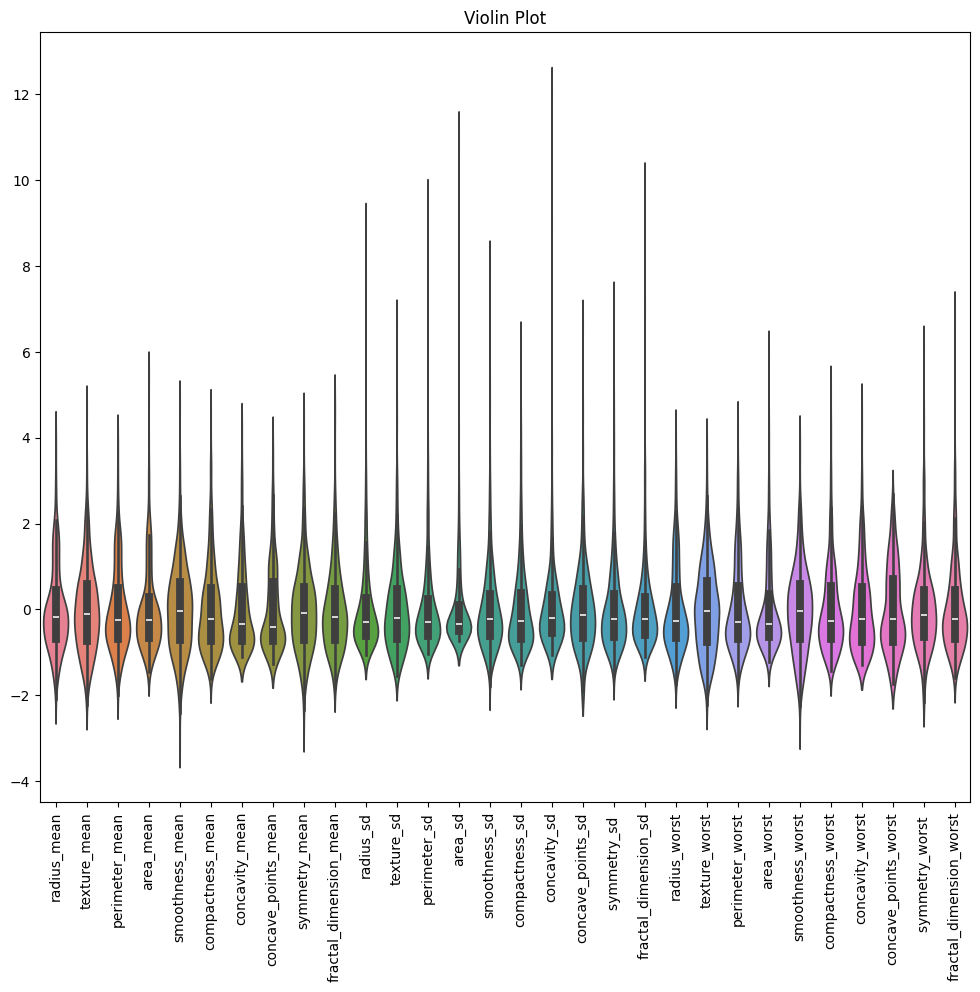

In [13]:
# Violin Plot
plt.figure(figsize=(12, 10))
sns.violinplot(data=sorted_scaled_data)
plt.title('Violin Plot')
plt.xticks(rotation=90)
plt.show()

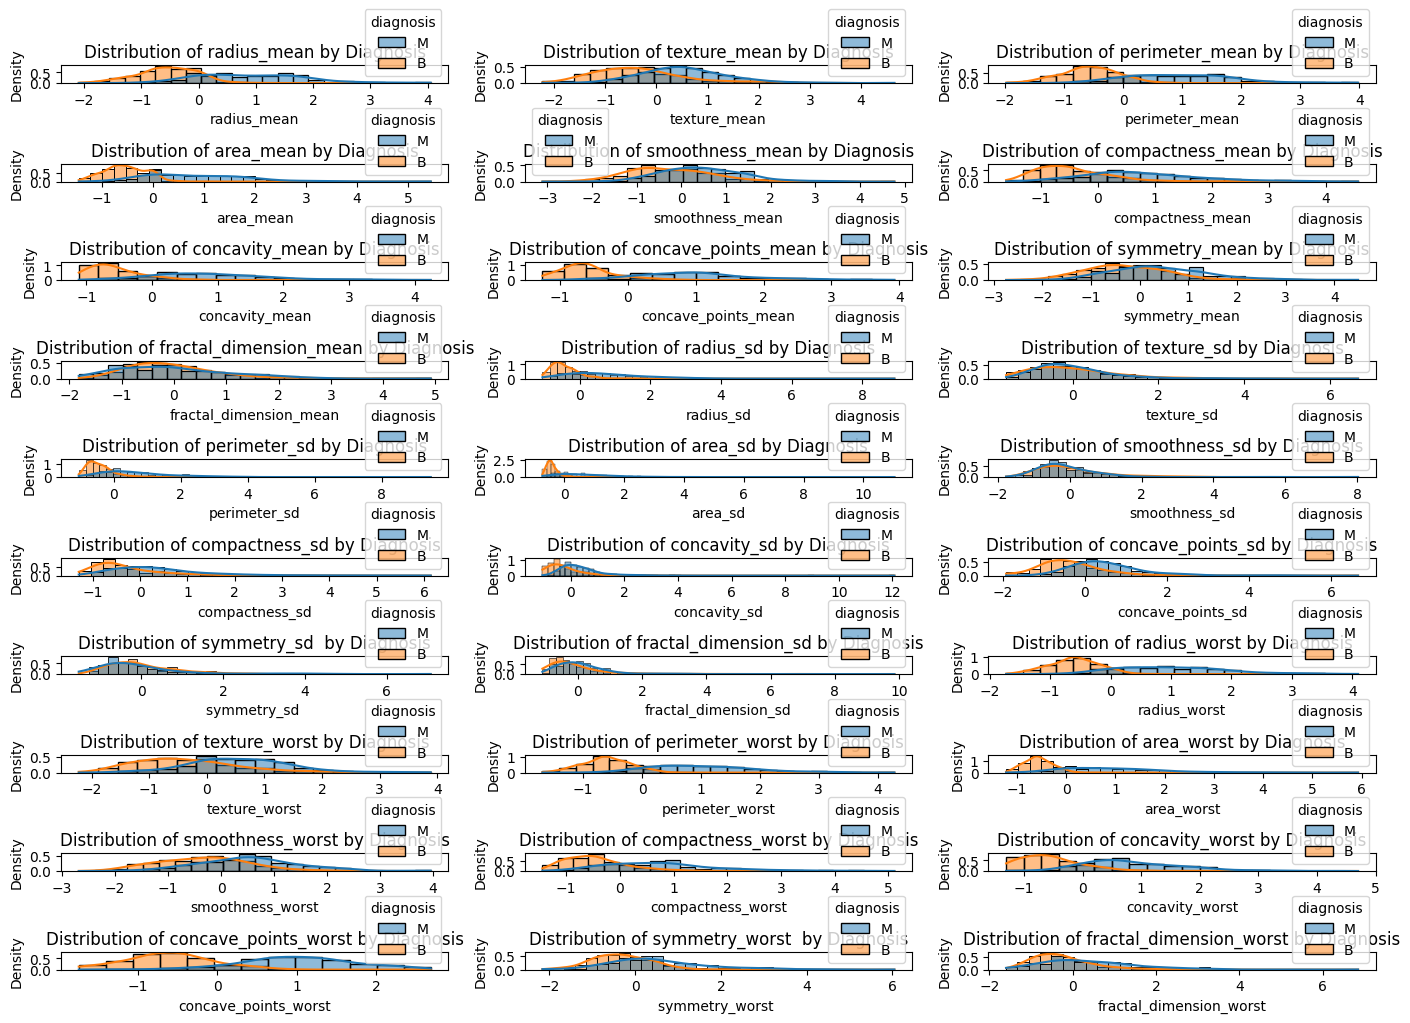

In [14]:
# Histogram
plt.figure(figsize=(14, 10))
diagnosis = breast_cancer_data['diagnosis']

# Calculate the number of rows and columns for the subplots
num_features = len(sorted_scaled_data.columns)
num_cols = 3
num_rows = int(np.ceil(num_features / num_cols))

# Plot histogram for each feature
for i, feature in enumerate(sorted_scaled_data, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(x=sorted_scaled_data[feature], hue=diagnosis, kde=True, stat="density", common_norm=False)
    plt.title(f"Distribution of {feature} by Diagnosis")

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

### 5) Top features which are best discriminating between the two classes visually

1.   texture_mean
2.   smoothness_mean
3. concave_points_mean
4. texture_worst
5. smoothness_worst
6. concave_points_worst





### 6) Dimensionality reduction with PCA

In [15]:
# Dimensionality reduction wit PCA
dim_red_pca = PCA(n_components=2)
dim_red_pca_result = dim_red_pca.fit_transform(sorted_scaled_data)
dim_red_pca_result

array([[-1.38567053,  0.0341121 ],
       [-2.5212771 , -1.98856877],
       [-2.23815893, -0.32908569],
       ...,
       [ 1.33873966, -1.28846714],
       [ 3.79230829,  0.82076501],
       [ 9.22083967,  1.86674197]])

In [16]:
# Convert PCA results into df
dim_red_pca_df = pd.DataFrame(dim_red_pca_result, columns=['PC1', 'PC2'])
dim_red_pca_df['diagnosis'] = labels
dim_red_pca_df

,PC1,PC2,diagnosis
0,-1.385671,0.034112,M
1,-2.521277,-1.988569,M
2,-2.238159,-0.329086,M
3,-3.161743,-1.451076,M
4,-0.794933,-2.117709,M
...,...,...,...
564,2.564812,4.679633,M
565,3.791970,5.977006,M
566,1.338740,-1.288467,M
567,3.792308,0.820765,M


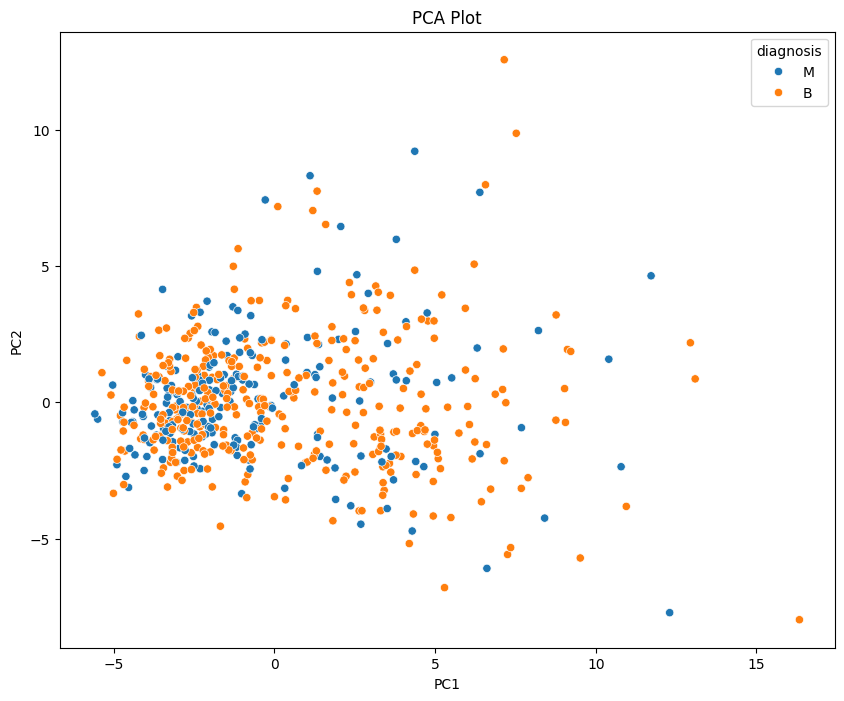

In [17]:
# Generate PCA plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=dim_red_pca_df)
plt.title('PCA Plot')
plt.show()

In [18]:
# Explained variance
explained_variance = dim_red_pca.explained_variance_ratio_
print(f"Explained Variance of PC1 = {explained_variance[0]}")
print(f"Explained Variance of PC2 = {explained_variance[1]}")

Explained Variance of PC1 = 0.44059157837516816
Explained Variance of PC2 = 0.1884189046363392


### Results of PCA



1.   PCA plot shows clear separation between malignant and benign samples, which means it captures the variance related to diagnosis.
2.   Malignant samples tend to cluster together more tightly than benign samples, suggesting high variance along PC1 and indicating more heterogeneity in PC2.
3. The separation indicates the dataset is well-structured for classification tasks, where PCA could be a useful processing step for machine learning models.



### 7) Model Building

In [19]:
# Data preparation for model building
top_features = ['texture_mean', 'smoothness_mean', 'concave_points_mean', 'texture_worst', 'smoothness_worst', 'concave_points_worst']
X = breast_cancer_data[top_features]
y = (breast_cancer_data['diagnosis'] == 'M').astype(int)

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [21]:
# Function to predict based on threshold
def predict_with_threshold(X, threshold):
  score = np.sum(X, axis=1)     # sum of features
  return (score >= threshold).astype(int)

In [22]:
# Function to evaluate model accuracy
def evaluate_model(X_test, y_test, threshold):
  y_pred = predict_with_threshold(X_test, threshold)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [23]:
# Determine a range of thresholds
train_sum = np.sum(X_train, axis=1)
thresholds = np.linspace(train_sum.min(), train_sum.max(), 100)
print(thresholds)

[22.03255    22.65525141 23.27795283 23.90065424 24.52335566 25.14605707
 25.76875848 26.3914599  27.01416131 27.63686273 28.25956414 28.88226556
 29.50496697 30.12766838 30.7503698  31.37307121 31.99577263 32.61847404
 33.24117545 33.86387687 34.48657828 35.1092797  35.73198111 36.35468253
 36.97738394 37.60008535 38.22278677 38.84548818 39.4681896  40.09089101
 40.71359242 41.33629384 41.95899525 42.58169667 43.20439808 43.82709949
 44.44980091 45.07250232 45.69520374 46.31790515 46.94060657 47.56330798
 48.18600939 48.80871081 49.43141222 50.05411364 50.67681505 51.29951646
 51.92221788 52.54491929 53.16762071 53.79032212 54.41302354 55.03572495
 55.65842636 56.28112778 56.90382919 57.52653061 58.14923202 58.77193343
 59.39463485 60.01733626 60.64003768 61.26273909 61.88544051 62.50814192
 63.13084333 63.75354475 64.37624616 64.99894758 65.62164899 66.2443504
 66.86705182 67.48975323 68.11245465 68.73515606 69.35785747 69.98055889
 70.6032603  71.22596172 71.84866313 72.47136455 73.

In [24]:
# Calculate accuracies
accuracies = [evaluate_model(X_test, y_test, threshold) for threshold in thresholds]
print(accuracies)

[0.34210526315789475, 0.34210526315789475, 0.34210526315789475, 0.34210526315789475, 0.34210526315789475, 0.34210526315789475, 0.34210526315789475, 0.35964912280701755, 0.35964912280701755, 0.3684210526315789, 0.37719298245614036, 0.3684210526315789, 0.3684210526315789, 0.3684210526315789, 0.39473684210526316, 0.41228070175438597, 0.4473684210526316, 0.45614035087719296, 0.45614035087719296, 0.4649122807017544, 0.47368421052631576, 0.49122807017543857, 0.5, 0.5175438596491229, 0.5526315789473685, 0.5614035087719298, 0.5789473684210527, 0.5964912280701754, 0.6228070175438597, 0.631578947368421, 0.6403508771929824, 0.6491228070175439, 0.6491228070175439, 0.6666666666666666, 0.6754385964912281, 0.6842105263157895, 0.7017543859649122, 0.7192982456140351, 0.7192982456140351, 0.7456140350877193, 0.7543859649122807, 0.7456140350877193, 0.7631578947368421, 0.7456140350877193, 0.7368421052631579, 0.7192982456140351, 0.7368421052631579, 0.7192982456140351, 0.7017543859649122, 0.7017543859649122,

Text(0.5, 1.0, 'Accuracy vs Threshold')

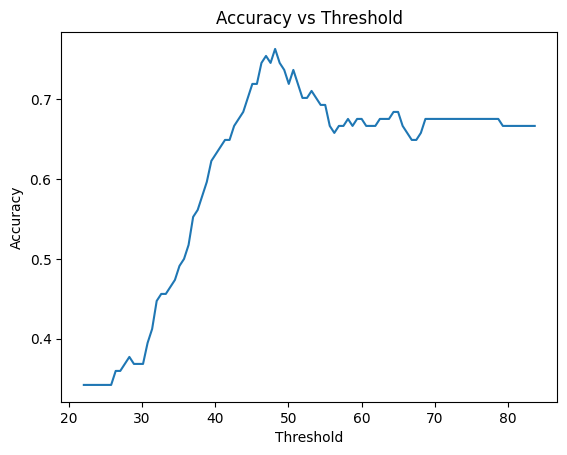

In [25]:
# accuracy vs threshold plot
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')

In [26]:
# Identify optimal threshold
optimal_threshold = thresholds[np.argmax(accuracies)]
print(f"Optimal Threshold = {optimal_threshold}")

Optimal Threshold = 48.18600939393939


In [27]:
# Identify best accuracy
best_accuracy = np.max(accuracies)
print(f"Best Accuracy = {best_accuracy}")

Best Accuracy = 0.7631578947368421


In [28]:
# Generate confusion matrix and classification report
y_pred = predict_with_threshold(X_test, optimal_threshold)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[58 17]
 [10 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        75
           1       0.63      0.74      0.68        39

    accuracy                           0.76       114
   macro avg       0.74      0.76      0.75       114
weighted avg       0.78      0.76      0.77       114



Text(0.5, 1.0, 'Precision-Recall Curve')

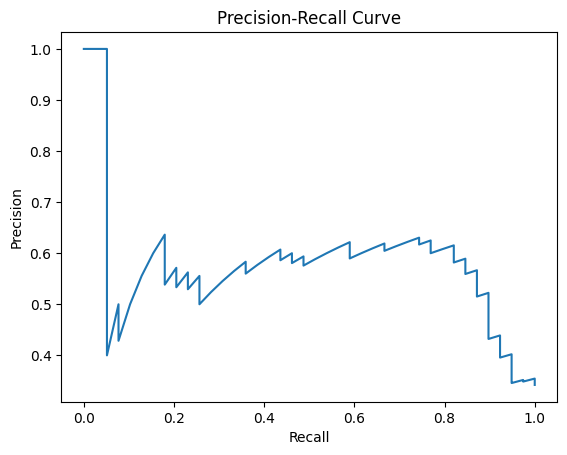

In [29]:
# Precision-Recall Curve
test_sum = np.sum(X_test, axis=1)
precision, recall, thresholds = precision_recall_curve(y_test, test_sum)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

### Result from Precision-Recall Trade-off



1.   Precision: Fewer false positives, useful to avoid alarming benign cases unnecessarily.
2.   Recall: Fewer false negatives, critical for identifying all malignant tumors.

In medical diagnostics, **recall** is generally prioritized to avoid missing malignant cases, even if it results in more false positives.

